In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from preprocessing import full_preprocessing
from proj1_helpers import *
from useful_functions import split_data, accuracy
from least_squares_GD import cross_validation_demo_GD, least_squares_GD
from least_squares_SGD import cross_validation_demo_SGD, least_squares_SGD
from Least_squares import *
from ridge_regression import *
from run_votations import *


%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = '../data/train.csv/train.csv' # for Mac : '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = '../data/test.csv/test.csv' # for Mac : '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

# Preprocessing

Looking at the shape of the data set first before preprocessing

In [3]:
print(np.shape(tX),np.shape(tX_test))

(250000, 30) (568238, 30)


In [4]:
tX_preprocessed, tX_test_preprocessed = full_preprocessing(tX, tX_test)

We check how many columns have been removes and that we didn't loose any lines

In [5]:
print(np.shape(tX_preprocessed),np.shape(tX_test_preprocessed))

(250000, 19) (568238, 19)


With preprocessing 11 columns have been removed and the data have been normalized

## Do your thing crazy machine learning thing here :) ...

In [6]:
x_tr,x_te,y_tr,y_te = split_data(tX_preprocessed,y,0.8)

# Gradient Descent

### Searching the best parameters using cross validation

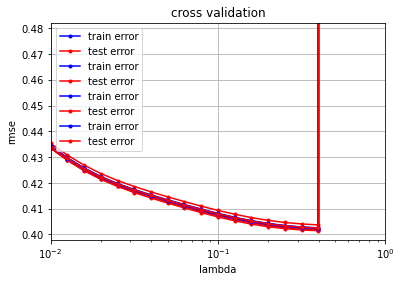

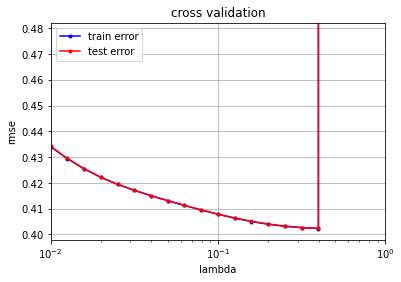

The best lambda found is [0.39810717]


In [7]:
lambdas = np.logspace(-2, 0, 21)
max_iters = 50
fmse_tr_mean_GD, fmse_te_mean_GD = cross_validation_demo_GD(tX_preprocessed, y, lambdas, max_iters)

best_lambda = lambdas[np.where(fmse_te_mean_GD == np.min(fmse_te_mean_GD))[0]]
print("The best lambda found is {l}".format(l=best_lambda))

### Calculing the best weights and accuracy with the parameters found

In [9]:
# Define the parameters of the algorithm.
max_iters = 1000

x_tr,x_te,y_tr,y_te = split_data(tX_preprocessed,y,0.8)

# Initialization
w_initial = np.zeros(tX_preprocessed.shape[1])

# Start gradient descent.
weight_GD, loss_GD = least_squares_GD(
    y_tr, x_tr, w_initial, max_iters, best_lambda)

y_pred_GD = predict_labels(weight_GD, x_te)
acc_GD = accuracy(y_pred_GD, y_te)

print("The accuracy found with the best model found with gradient descent is {a} for lambda={l}.".format(
        a=acc_GD, l=best_lambda))

The accuracy found with the best model found with gradient descent is 0.7059 for lambda=[0.39810717].


# Stochastic gradient descent

### Searching the best parameters using cross validation

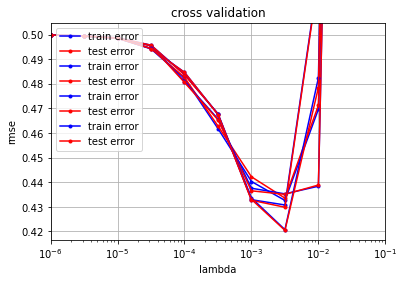

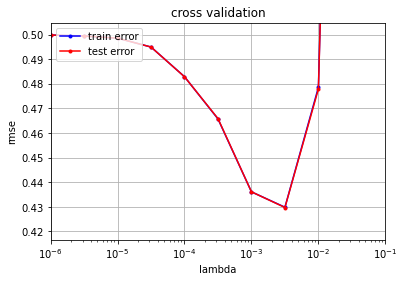

The best lambda found is [0.00316228]


In [10]:
lambdas = np.logspace(-6, -1, 11)
max_iters = 500
fmse_tr_mean_SGD, fmse_te_mean_SGD = cross_validation_demo_SGD(tX_preprocessed, y, lambdas, max_iters)
    
best_indexes = np.where(fmse_tr_mean_SGD == np.min(fmse_tr_mean_SGD))
best_lambda = lambdas[best_indexes]

print("The best lambda found is {l}".format(l=best_lambda))

### Calculing the best weights and accuracy with the parameters found

In [11]:
# Define the parameters of the algorithm.
max_iters = 2000

x_tr,x_te,y_tr,y_te = split_data(tX_preprocessed,y,0.8)

# Initialization
w_initial = np.zeros(tX_preprocessed.shape[1])

# Start gradient descent.
weight_SGD, loss_SGD = least_squares_SGD(
    y_tr, x_tr, w_initial, max_iters, best_lambda)

y_pred_SGD = predict_labels(weight_SGD, x_te)
acc_SGD = accuracy(y_pred_SGD, y_te)


print("The accuracy found with the best model found with stochastic gradient descent is {a} for lambda={l}.".format(
        a=acc_SGD, l=best_lambda))

The accuracy found with the best model found with stochastic gradient descent is 0.68216 for lambda=[0.00316228].


# Least Squares Normal Equation

The optimal degree for Least squares method is 12 with a mean accuracy accross the k-fold of 0.811120.


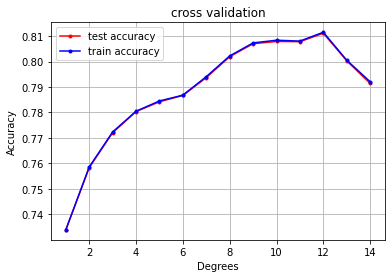

In [30]:
# We find our optimal degree using cross validation
optimal_degree_least_squares_normal, accuracy_least_squares = cross_validation_demo_least_squares(tX_preprocessed,y)

#Using the optimal degree we form a dataset
x_poly = build_poly(tX_preprocessed, optimal_degree_least_squares_normal)

# We train our model using the polynomial dataset
weights_least_squares, loss_least_squares = least_squares_normal(y,x_poly)

# Now we predict for the test data using our trained model

x_te_poly = build_poly(tX_test_preprocessed,optimal_degree_least_squares_normal)
y_pred_least_squares = predict_labels(weights_least_squares, x_te_poly)

# Ridge Regression

The optimal parameters for the ridge regression are lambda = 0.000010 and degree = 13 for a mean accuracy across the k-fold of 0.812768


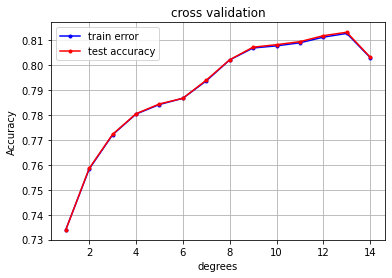

In [31]:
# We find our optimal degree and optimal lambda using cross validation
optimal_lambda_ridge_regression, optimal_degree_ridge_regression, accuracy_ridge_regression = \
    cross_validation_demo_ridge_regression(tX_preprocessed, y)

#Using the optimal degree we form a dataset
x_poly = build_poly(tX_preprocessed, optimal_degree_ridge_regression)

# We train our model using the polynomial dataset
weights, loss = ridge_regression_function(y,x_poly,optimal_lambda_ridge_regression)

# Now we predict for the test data using our trained model

x_te_poly = build_poly(tX_test_preprocessed,optimal_degree_ridge_regression)
y_pred_ridge_regression = predict_labels(weights, x_te_poly)

## Plot of accuracy across degrees 

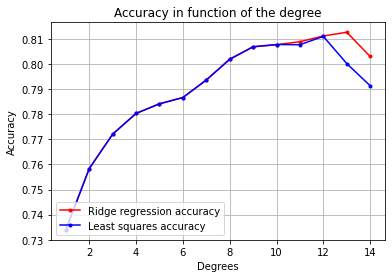

In [14]:
degrees = range(1,15)
plt.plot(degrees, accuracy_ridge_regression, marker=".", color='r', label='Ridge regression accuracy')
plt.plot(degrees, accuracy_least_squares, marker=".", color='b', label='Least squares accuracy')
plt.xlabel("Degrees")
plt.ylabel("Accuracy")
plt.title("Accuracy in function of the degree")
plt.legend(loc=3)
plt.grid(True)
plt.savefig("degree")

# Logistic regression

c:\Users\clems\OneDrive\Documentos\MasterDS\Semestre_3\Machine_learning\ml-project-1-ccd_ml\scripts\logistic_regression.py:14: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))


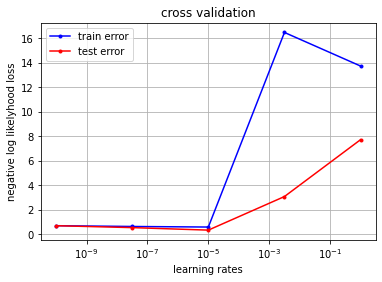

In [13]:
from logistic_regression import *
x_tr,x_te,y_tr,y_te = split_data(tX_preprocessed,y,0.8)

# Looking for optimal learning rate for logistic regression
log_lr = cross_validation_demo_log_lr(tX_preprocessed, y, show_box_plot = False)

In [14]:
print("We obtain as best learning rate hyperparameter {}".format(log_lr))

We obtain as best learning rate hyperparameter 1e-05


In [15]:
y_pred_lr = compute_LR(y_tr, x_tr, x_te)
lr_accuracy = accuracy(y_pred_lr, y_te)
print("We obtain a corresponding accuracy of {}".format(lr_accuracy))

We obtain a corresponding accuracy of 0.71456


c:\Users\clems\OneDrive\Documentos\MasterDS\Semestre_3\Machine_learning\ml-project-1-ccd_ml\scripts\logistic_regression.py:14: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))
c:\Users\clems\OneDrive\Documentos\MasterDS\Semestre_3\Machine_learning\ml-project-1-ccd_ml\scripts\logistic_regression.py:14: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))
c:\Users\clems\OneDrive\Documentos\MasterDS\Semestre_3\Machine_learning\ml-project-1-ccd_ml\scripts\logistic_regression.py:14: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))


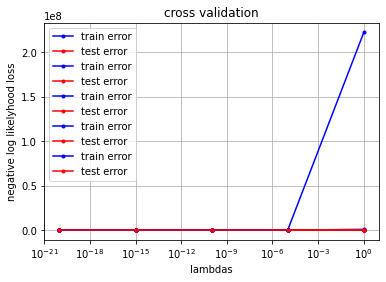

In [16]:
#Looking for optimal learning rate and regularization coefficient lambda for regularized logistic regression
lrs = [1e-7, 1e-5, 1e-3, 1e-2, 1e-1]
log_lambdas = []
for lr in lrs:  
    log_lambdas.append(cross_validation_demo_log_lambda(tX_preprocessed, y, lr))


We find optimal the following optimal hyperparameters:

learning_rate = 10<sup>-2</sup>

lambda = 10<sup>-5</sup>

In [17]:
y_pred_rlr = compute_RLR(y_tr, x_tr, x_te)
accuracy(y_pred_rlr, y_te)


c:\Users\clems\OneDrive\Documentos\MasterDS\Semestre_3\Machine_learning\ml-project-1-ccd_ml\scripts\logistic_regression.py:14: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))


0.71466

We notice a slight improvement in the accuracy with a regularization factor from 0.714 to 0.715

# Votation strategy

The idee is to use all the previously done methods and to make them vote to get a combined result.

In [20]:
tX_train_preprocessed, tX_te_preprocessed, y_tr, y_te = split_data(tX_preprocessed, y, 0.8)

print("Computing gradient descent.")
y_pred_GD = compute_GD(y_tr, tX_train_preprocessed, tX_te_preprocessed)
print("Computing stochastic gradient descent.")
y_pred_SGD = compute_SGD(y_tr, tX_train_preprocessed, tX_te_preprocessed)
print("Computing least square.")
y_pred_LS = compute_LS(y_tr, tX_train_preprocessed, tX_te_preprocessed)
print("Computing ridge regression.")
y_pred_RR = compute_RR(y_tr, tX_train_preprocessed, tX_te_preprocessed)
print("Computing logistic regression.")
y_pred_LR = compute_LR(y_tr, tX_train_preprocessed, tX_te_preprocessed)
print("Computing regularized logistic regression.")
y_pred_RLR = compute_RLR(y_tr, tX_train_preprocessed, tX_te_preprocessed)

acc_GD = accuracy(y_pred_GD, y_te)
acc_SGD = accuracy(y_pred_SGD, y_te)
acc_LS = accuracy(y_pred_LS, y_te)
acc_RR = accuracy(y_pred_RR, y_te)
acc_LR = accuracy(y_pred_LR, y_te)
acc_RLR = accuracy(y_pred_RLR, y_te)

print("Computing votations.")
y_pred = vote(y_pred_GD, y_pred_SGD, y_pred_LS, y_pred_RR, y_pred_LR, y_pred_RLR)

acc = accuracy(y_pred, y_te)

print("The Gradient descend accuracy is {a}".format(a=acc_GD))
print("The Stochastic Gradient descend accuracy is {a}".format(a=acc_SGD))
print("The Least square accuracy is {a}".format(a=acc_LS))
print("The Ridge regression accuracy is {a}".format(a=acc_RR))
print("The Logistic regression accuracy is {a}".format(a=acc_LR))
print("The Regularised Logistic regression accuracy is {a}".format(a=acc_RLR))
print("The voting accuracy is {a}".format(a=acc))

Computing gradient descent.
Computing stochastic gradient descent.
Computing least square.
Computing ridge regression.
Computing logistic regression.
Computing regularized logistic regression.
Computing votations.
The Gradient descend accuracy is 0.7059
The Stochastic Gradient descend accuracy is 0.68216
The Least square accuracy is 0.8105
The Ridge regression accuracy is 0.8084
The Logistic regression accuracy is 0.71456
The Regularised Logistic regression accuracy is 0.71466
The voting accuracy is 0.73922


### Weighted votation

In [21]:
a = acc_GD
b = acc_SGD
c = acc_LS
d = acc_RR
e = acc_LR
f = acc_RLR
y_pred = vote(a*y_pred_GD, b*y_pred_SGD, c*y_pred_LS, d*y_pred_RR, e*y_pred_LR, f*y_pred_RLR)

acc = accuracy(y_pred, y_te)

print("The voting accuracy is {a}".format(a=acc))

The voting accuracy is 0.73922


In [22]:
# This is a test of competition weight : the best model has the biggest weight (6), the second best a bit less (5),...
a = 4
b = 1
c = 5
d = 6
e = 3
f = 4
y_pred = vote(a*y_pred_GD, b*y_pred_SGD, c*y_pred_LS, d*y_pred_RR, e*y_pred_LR, f*y_pred_RLR)

acc = accuracy(y_pred, y_te)
print("The voting accuracy is {a}".format(a=acc))

The voting accuracy is 0.73922


In [26]:
# Grid search
r = 5
acc = np.zeros((r,r,r,r,r,r))
for a in range(r):
    for b in range(r):
        for c in range(r):
            for d in range(r):
                for e in range(r):
                    for f in range(r):
                        print("(a,b,c,d,e,f)=({a},{b},{c},{d},{e},{f})".format(
                              a=a,b=b,c=c,d=d,e=e,f=f), end="\r")
                        y_pred = vote(a*y_pred_GD, b*y_pred_SGD, c*y_pred_LS, d*y_pred_RR, e*y_pred_LR, f*y_pred_RLR)

                        acc[a][b][c][d][e][f] = accuracy(y_pred, y_te)
index = np.where(acc==np.amax(acc))
best_acc = acc[index]
print("The voting accuracy is {acc} for (a,b,c,d,e,f)=({a},{b},{c},{d},{e},{f})".format(
    acc=best_acc[0],a=index[0][0],b=index[1][0],c=index[2][0],d=index[3][0],e=index[4][0],f=index[5][0]))

The voting accuracy is 0.8105 for (a,b,c,d,e,f)=(0,0,1,0,0,0)


## Save ouput in csv format for submission:

In [27]:
OUTPUT_PATH = '../data/sample-submission.csv' 
create_csv_submission(ids_test, y_pred_ridge_regression, OUTPUT_PATH)